## Goals
In this lab we will:

explore feature engineering and polynomial regression which allows us to use the machinery of linear regression to fit very complicated, even very non-linear functions.

Feature Engineering and Polynomial Regression

First lets just start with some handy work for a quick overview what is polynonomial regression

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import zscore_normalize_features, run_gradient_descent_feng
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

In [47]:
import copy  # Import the copy module
import math # Import the math module
import time # Import the time module

In [2]:
# Data points
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 6, 12, 20, 30])

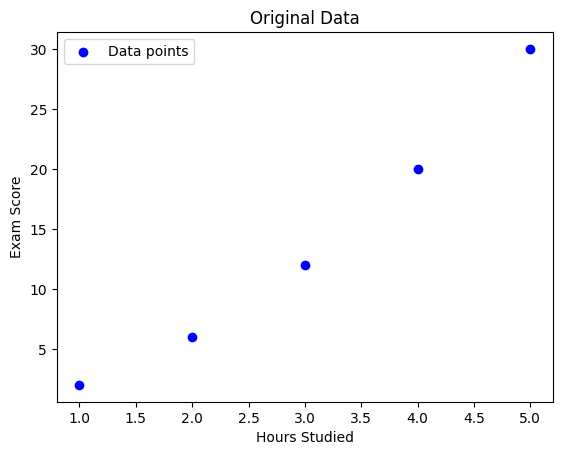

In [3]:
# Plotting the original data points
plt.scatter(x, y, color='blue', label='Data points')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Original Data')
plt.legend()
plt.show()

### Polynomial Regression Equation
y=b0+ b1 x^1 + b2 x^2

### Step 1 Design Matrix X
construct the design matrix X. For a quadratic polynomial, the design matrix will include 
a column of ones (for the intercept term b0),
a column for the linear term x,
and a column for the quadratic term x^2

In [6]:
# Build the design matrix for a quadratic polynomial
X = np.column_stack((np.ones(x.shape), x, x**2))

print("Design Matrix (X):\n", X)

Design Matrix (X):
 [[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]]


### Step 2 Set Up the Normal Equation for b
Find the coefficients b=[b0,b1,b2]𝑇 that minimize the squared error between the predicted and actual values. This can be done by solving the normal equation: 

b=(X𝑇 X)−1 . X𝑇y

Here:

- X is the matrix of input features (including a column of ones for the intercept term b0).
- y is the vector of actual output values.
- b is the vector of coefficients we want to find.

By solving this equation, we obtain the values of b0 ,  b1 , and b2 that best fit the data in the least squares sense.

In [8]:
# Compute the coefficients using the normal equation b=(X𝑇 X)−1 . X𝑇y
# Transpose the matrix X
X_transpose = X.T

# Calculate the coefficients (b) using the normal equation
# This is equivalent to: b = (X^T * X)^-1 * (X^T * y)
# The @ operator is used for matrix multiplication in Python, which is required here instead of element-wise multiplication (*)
b = np.linalg.inv(X_transpose @ X) @ X_transpose @ y

# Print the coefficients
print("Coefficients (b):", b)

Coefficients (b): [-3.90798505e-14  1.00000000e+00  1.00000000e+00]


In [9]:
# Generate predictions using the model
y_pred = X @ b

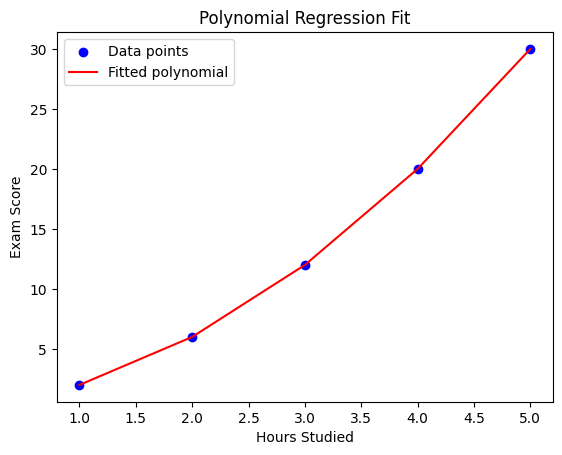

In [10]:
# Plotting the original data and the fitted polynomial curve
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Fitted polynomial')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()

### Now, let's test on some unseen data

In [12]:
x_new = np.array([6, 7, 8])  # New data points
X_new_design = np.column_stack((np.ones(x_new.shape), x_new, x_new**2))  # Build the design matrix for the new data
y_new_pred = X_new_design @ b  # Predict the new values

# Print the predictions
for i, hours in enumerate(x_new):
    print(f"Predicted exam score for {hours} hours studied: {y_new_pred[i]:.2f}")

Predicted exam score for 6 hours studied: 42.00
Predicted exam score for 7 hours studied: 56.00
Predicted exam score for 8 hours studied: 72.00


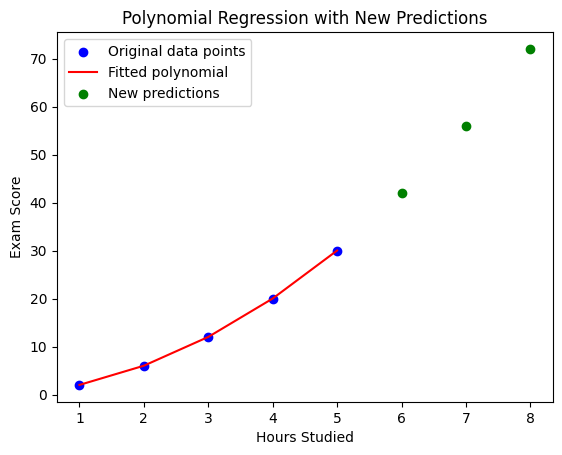

In [13]:
# Plotting the original data, the fitted curve, and the new predictions
plt.scatter(x, y, color='blue', label='Original data points')
plt.plot(x, y_pred, color='red', label='Fitted polynomial')
plt.scatter(x_new, y_new_pred, color='green', label='New predictions')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Polynomial Regression with New Predictions')
plt.legend()
plt.show()

Good job, we have done with some easy understandings of polynomial regression.. now lets start the class work

### Feature Engineering and Polynomial Regression Overview
Out of the box, linear regression provides a means of building models of the form:

                fwb = w0x0 + w1x1 + w2+x2 + b
 
What if your features/data are non-linear or are combinations of features? For example, Housing prices do not tend to be linear with living area but penalize very small or very large houses resulting in the curves shown in the graphic above. How can we use the machinery of linear regression to fit this curve? Recall, the 'machinery' we have is the ability to modify the parameters w, b in (1) to 'fit' the equation to the training data. However, no amount of adjusting of w, b in (1) will achieve a fit to a non-linear curve.

### Polynomial Features

Above we were considering a scenario where the data was non-linear. Let's try using what we know so far to fit a non-linear curve. We'll start with a simple quadratic: y = 1 +x^2

### Creating Target Data

In [19]:
# np.arange(start, stop, step) generates an array of values starting from 0 to 19 with a step of 1.
x = np.arange(0, 20, 1)
# Generate the corresponding y values using the quadratic function y = 1 + x^2
y = 1 + x**2

print("Original Data Points:")
print("x:", x)
print("y:", y)

Original Data Points:
x: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
y: [  1   2   5  10  17  26  37  50  65  82 101 122 145 170 197 226 257 290
 325 362]


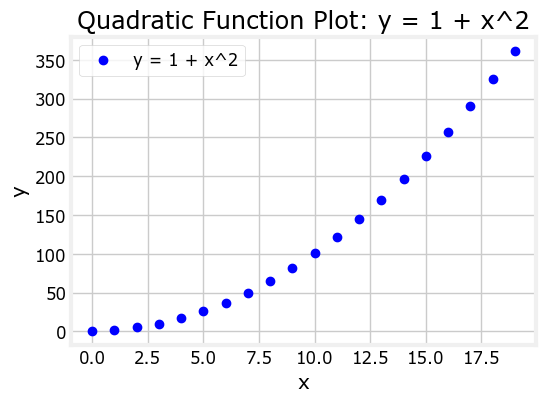

In [28]:
# Plot the points
plt.figure(figsize=(6, 4))
plt.plot(x, y, 'bo', label='y = 1 + x^2')  # 'bo' means blue color and circle marker
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Function Plot: y = 1 + x^2')
plt.legend()
plt.grid(True)  # Adding grid for better readability
plt.show()

### Reshaping x for Polynomial Features

The reshape function in NumPy is used to change the shape of the array without changing its data.

The -1 in the reshape function tells NumPy to automatically calculate the number of rows, based on the original array's size, while 1 specifies the number of columns.

This converts x from a 1D array of shape (20,) to a 2D array (matrix) of shape (20, 1).

Reshaping is necessary because many machine learning models expect the input features to be in a 2D array format where each feature is in a separate column.

In [30]:
# reshape the x array to a column vector with the shape (20, 1)
X = x.reshape(-1, 1)

print("X:", X)

X: [[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]]


At this moment, we have our `x` and `y` data, but they are non-linear. Our next step is to apply gradient descent to this data for two main reasons:

1. **To Minimize Error:** We want to reduce the difference between the predicted values and the actual values.
2. **To Find Optimal `w` and `b`:** We aim to identify the best-fitting model parameters (weights and bias).

### Next Steps
We will write the following functions one by one and understand their purpose as we go:

- `compute_cost`: This function will calculate the cost (error) of the model for a given set of parameters.
- `compute_gradient`: This function will compute the gradient, which tells us how to adjust the parameters to reduce the cost.
- `gradient_descent`: This function will use the gradient to iteratively update the parameters and minimize the cost.
- `gradient_descent_polynomial`: This function will specifically apply gradient descent for polynomial regression.

Since gradient descent requires a learning rate, we will pass `alpha = 1e-2` as a parameter.

Let's start writing these functions and delve deeper into the process as we progress.

### compute_cost

The my_compute_cost function calculates the cost (or error) of a linear regression model given the features X, 
the target values y, the weights w, and the bias b. The cost is a measure of how well the model's 
predictions match the actual data.

In [38]:
# Loop version of multi-variable compute_cost
def compute_cost(X, y, w, b): 
    """
    compute_cost
    Args:
      X : (ndarray): Shape (m,n) matrix of examples with multiple features
      w : (ndarray): Shape (n)   parameters for prediction   
      b : (scalar):              parameter  for prediction   
    Returns
      cost: (scalar)             cost
    """
    # number of examples
    m = X.shape[0]
    # initialize cost
    cost = 0.0
    # loop over examples m and compute cost
    for i in range(m):
        # compute the predicted value                                
        f_wb_i = np.dot(X[i],w) + b  
         # sum the squared differences between the predicted and actual values    
        cost = cost + (f_wb_i - y[i])**2 
    # average the squared differences and return                 
    cost = cost/(2*m)
    # squeeze the cost to make it a scalar                           
    return(np.squeeze(cost))

In [39]:
# Test the function with some example values
# Define the features X, target y, weights w, and bias b
X = np.array([[1, 2], [3, 4]])
y = np.array([5, 6])
w = np.array([0.1, 0.2])
b = 0.5

# Compute the cost using the function
cost = compute_cost(X, y, w, b)
print("Cost:", cost)


Cost: 8.84


The cost value of `8.84` represents the average squared error between the model's predictions and the actual target values. It quantifies how far the predictions are from the true values, with lower values indicating better model performance.

### compute_gradient

The compute_gradient function calculates how much the cost function changes (the gradients) with respect to 
the model's parameters (w and b) in linear regression. 

These gradients help adjust the parameters during gradient descent to reduce the overall error in the model.

In [40]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression.
 
    Args:
      X : (array_like Shape (m,n)) Features (e.g., house size, number of rooms)
      y : (array_like Shape (m,1)) Actual target values (e.g., house prices)
      w : (array_like Shape (n,1)) Parameters (weights) of the model      
      b : (scalar)                 Parameter (bias) of the model      
    Returns:
      dj_dw: (array_like Shape (n,1)) Gradient of the cost with respect to the weights (w).
      dj_db: (scalar)                Gradient of the cost with respect to the bias (b).
    """

    # Get the number of examples (m) and features (n)
    m, n = X.shape
    
    # Initialize the gradients to zero (will store the gradients for w and b)
    dj_dw = np.zeros((n, 1))  # Gradient for weights (w)
    dj_db = 0.0               # Gradient for bias (b)
    
    # Compute the predicted values using the current model parameters (w and b)
    f_wb = X @ w + b  # X @ w is matrix multiplication, adding bias b
    
    # Calculate the error (difference between predictions and actual values)
    e = f_wb - y
    
    # Compute the gradient for the weights (w)
    # The gradient is the average of the product of the features and the error
    dj_dw = (1/m) * (X.T @ e)  # X.T @ e is matrix multiplication of X transpose with error vector
    
    # Compute the gradient for the bias (b)
    # The gradient is the average of the error across all examples
    dj_db = (1/m) * np.sum(e)  # np.sum(e) sums up all the errors
    
    # Return the gradients
    return dj_db, dj_dw

In [41]:
# Test the function with some example values
# Define the features X, target y, weights w, and bias b
X = np.array([[1, 2], [3, 4]])  # Features
y = np.array([5, 6])  # Target
w = np.array([0.1, 0.2])  # Weights
b = 0.5  # Bias

# Compute the gradients using the function
dj_db, dj_dw = compute_gradient(X, y, w, b)
# Print the gradients
print("Gradient for weights (dj_dw):", dj_dw)
print("Gradient for bias (dj_db):", dj_db)

Gradient for weights (dj_dw): [ -8.6 -12.8]
Gradient for bias (dj_db): -4.2


- `dj_db = -4.2`: This means that the bias term should be adjusted by decreasing it (since the gradient is negative) to reduce the overall error. A larger negative gradient would indicate a larger adjustment needed.

- `dj_dw = [-8.6, -12.8]`: These values indicate how much each weight (w1 and w2) should be adjusted. The larger the magnitude, the more the corresponding weight should be changed. Both gradients are negative, suggesting that both weights should be decreased to reduce the prediction error.

### gradient_descent
The gradient_descent function performs batch gradient descent to update the parameters of a linear model (or similar) in order to minimize a given cost function. The function iteratively updates the model's parameters using the computed gradients, gradually reducing the error between the predicted and actual target values.

In [48]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X : (array_like Shape (m,n)    matrix of examples 
      y : (array_like Shape (m,))    target value of each example
      w_in : (array_like Shape (n,)) Initial values of parameters of the model
      b_in : (scalar)                Initial value of parameter of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    # Get the number of examples (m) and features (n)
    m, n = X.shape

    # Dictionary to store values at each iteration for graphing
    hist = {}  # history dictionary
    hist["cost"] = []  # to store the cost value at each iteration
    hist["params"] = []  # to store the parameters at each iteration
    hist["grads"] = []  # to store the gradients at each iteration
    hist["iter"] = []  # to store the iteration number

    # hist["cost"] = []; hist["params"] = []; hist["grads"] = []; hist["iter"] = [];

    # Initialize the weights and bias.
    # w and b: Local copies of the initial parameters to prevent changes to the original inputs.
    w = copy.deepcopy(w_in) #avoid modifying global w within function
    b = b_in

    # Control how often the cost and parameters are saved in hist. 
    # This is to prevent excessive memory usage in very long runs.
    save_interval = np.ceil(num_iters / 10000)  # Prevent resource exhaustion for long runs

    # Perform gradient descent
    for i in range(num_iters):
        # Compute the cost
        cost = cost_function(X, y, w, b)
        # Compute the gradients
        dj_db, dj_dw = gradient_function(X, y, w, b)
        # Update the weights and bias
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save the cost and parameters every save_interval iterations
        if i % save_interval == 0:
            hist["cost"].append(cost)
            hist["params"].append((w, b))
            hist["grads"].append((dj_dw, dj_db))
            hist["iter"].append(i)

        # Print the cost interval 10 times during the run
        # This is to show progress during long runs
        # The cost should decrease on each iteration
        if i % math.ceil(num_iters / 10) == 0:
            cst = cost_function(X, y, w, b)
            print(f"Iteration {i:9d}, Cost: {cst:0.5e}")

    #Return the final parameters and the history dictionary
    # The history dictionary contains the cost, parameters, gradients, and iteration numbers
    # at regular intervals during the gradient descent process
    # This can be used for analysis and plotting
    # The final parameters are returned to use for prediction
    # The history dictionary is returned to analyze the learning process
    # and to plot the cost, parameters, and gradients over time
    return w, b, hist

In [62]:
# Test the function with some example values
# Define the features X, target y, initial weights w, and initial bias b
x = np.array([[1, 2], [3, 4]])  # Features
y = np.array([5, 6])  # Target
w = np.array([0.1, 0.2])  # Initial weights
b = 0.5  # Initial bias
alpha = 0.01  # Learning rate 1e-2
num_iters = 1000  # Number of iterations

# Run the gradient descent algorithm
w_final, b_final, hist = gradient_descent(x, y, w, b, compute_cost, compute_gradient, alpha, num_iters)

# Print the final weights and bias
print("Final weights (w_final):", w_final)
print("Final bias (b_final):", b_final)

Iteration         0, Cost: 6.48730e+00
Iteration       100, Cost: 5.25296e-01
Iteration       200, Cost: 3.59280e-01
Iteration       300, Cost: 2.45732e-01
Iteration       400, Cost: 1.68070e-01
Iteration       500, Cost: 1.14952e-01
Iteration       600, Cost: 7.86224e-02
Iteration       700, Cost: 5.37743e-02
Iteration       800, Cost: 3.67793e-02
Iteration       900, Cost: 2.51554e-02
Final weights (w_final): [-0.78  1.45]
Final bias (b_final): 2.6332333158994126


In [65]:
# Compute the final cost using the final weights and bias
final_cost = compute_cost(x, y, w_final, b_final)
# print(f"Final Cost: {final_cost:.5f}")

# Generate predictions using the final model parameters
y_pred = x @ w_final + b_final

# Generate predictions using the initial weights and bias
y_pred_initial = x @ w + b


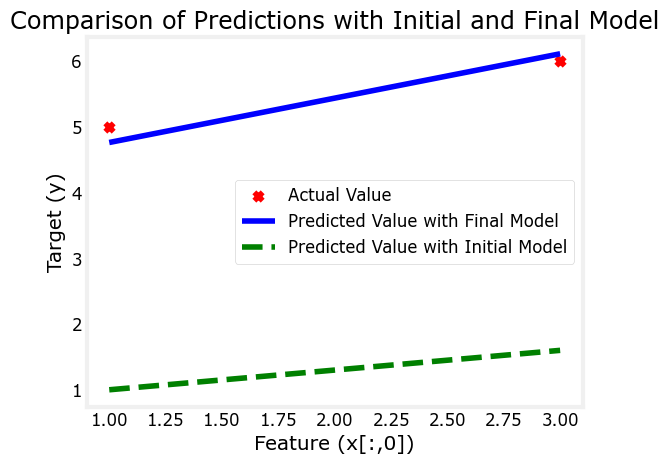

In [66]:
# Plotting the data points
plt.scatter(x[:, 0], y, marker='x', c='r', label="Actual Value")
plt.plot(x[:, 0], y_pred, label="Predicted Value with Final Model", color='b')
plt.plot(x[:, 0], y_pred_initial, label="Predicted Value with Initial Model", color='g', linestyle='--')

# Plotting details
plt.title("Comparison of Predictions with Initial and Final Model")
plt.xlabel("Feature (x[:,0])")
plt.ylabel("Target (y)")
plt.legend()
plt.show()


It's impressive to see how, after applying gradient descent, we obtained optimized values for both \( w \) and \( b \).
So at this point we have created functions for cost, gradient and gradient descent to get optimal w,b for a linear data set case... but we have to do something for non linear data i mean polynomial regression.. 

so lets go back to our initial equation  y= 1+x^2

In [67]:
# create target data
x = np.arange(0, 20, 1)
y = 1 + x**2
# reshape the x array to a column vector with the shape (20, 1)
X = x.reshape(-1, 1)

print("X:", X)
print("y:", y)


X: [[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]]
y: [  1   2   5  10  17  26  37  50  65  82 101 122 145 170 197 226 257 290
 325 362]


In [68]:
# Get number of examples and features
m,n = X.shape
# initialize parameters
initial_w = np.zeros(n)
initial_b = 0
# Set the learning rate alpha
alpha = 0.01
# Set the number of iterations
num_iters = 1000

# Run the gradient descent to get the final weights and bias without feature engineering for polynomial equation
model_w, model_b , hist = gradient_descent(X, y, initial_w, initial_b, compute_cost, compute_gradient, alpha, num_iters)

# Print the final weights and bias
print(f"w,b found by gradient descent: w: {model_w}, b: {model_b :0.4f}")

Iteration         0, Cost: 1.65756e+03
Iteration       100, Cost: 6.94549e+02
Iteration       200, Cost: 5.88475e+02
Iteration       300, Cost: 5.26414e+02
Iteration       400, Cost: 4.90103e+02
Iteration       500, Cost: 4.68858e+02
Iteration       600, Cost: 4.56428e+02
Iteration       700, Cost: 4.49155e+02
Iteration       800, Cost: 4.44900e+02
Iteration       900, Cost: 4.42411e+02
w,b found by gradient descent: w: [18.7], b: -52.0834


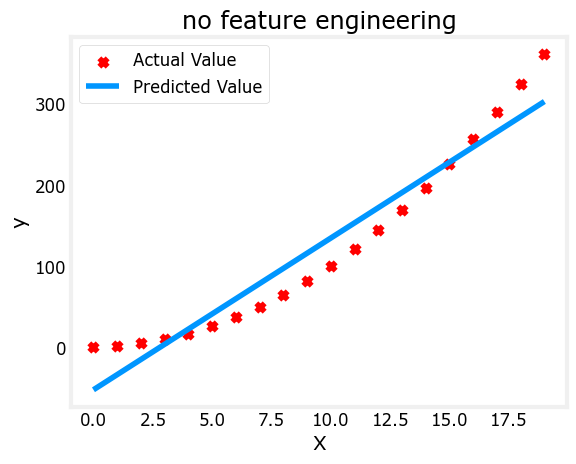

In [69]:
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("no feature engineering")
plt.plot(x,X@model_w + model_b, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

You can see.. our actual target values increasing in an curve order while we compute our gradient descent for a linear line which is performing good but its not returning the w b which can follow actual curve line... so we need some changes

We will actually engineer/sacle our input feature

In [74]:
# We start by creating a target dataset where the relationship between `x` and `y` follows a quadratic function.
# Specifically, our target data is generated using the equation: y = 1 + x^2

# Generate the target data
x = np.arange(0, 20, 1)
y = 1 + x**2

# Engineer the features to include the quadratic term
X = x**2
# By including x**2 as a feature, we allow our model to better fit the quadratic relationship between x and y.

# Reshape the X array to a column vector with the shape (20, 1)
X = X.reshape(-1, 1)

# Get number of examples and features
m,n = X.shape
# initialize parameters
initial_w = np.zeros(n)
initial_b = 0
# Set the learning rate alpha
alpha = 1e-5
# Set the number of iterations
num_iters = 10000

# Run the gradient descent to get the final weights and bias without feature engineering for polynomial equation
model_w, model_b , hist = gradient_descent(X, y, initial_w, initial_b, compute_cost, compute_gradient, alpha, num_iters)

# Print the final weights and bias
print(f"w,b found by gradient descent: w: {model_w}, b: {model_b :0.4f}")

# Print X and y and x
print("X:", X)
print("y:", y)
print("x:", x)

Iteration         0, Cost: 7.32922e+03
Iteration      1000, Cost: 2.24844e-01
Iteration      2000, Cost: 2.22795e-01
Iteration      3000, Cost: 2.20764e-01
Iteration      4000, Cost: 2.18752e-01
Iteration      5000, Cost: 2.16758e-01
Iteration      6000, Cost: 2.14782e-01
Iteration      7000, Cost: 2.12824e-01
Iteration      8000, Cost: 2.10884e-01
Iteration      9000, Cost: 2.08962e-01
w,b found by gradient descent: w: [1.], b: 0.0490
X: [[  0]
 [  1]
 [  4]
 [  9]
 [ 16]
 [ 25]
 [ 36]
 [ 49]
 [ 64]
 [ 81]
 [100]
 [121]
 [144]
 [169]
 [196]
 [225]
 [256]
 [289]
 [324]
 [361]]
y: [  1   2   5  10  17  26  37  50  65  82 101 122 145 170 197 226 257 290
 325 362]
x: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


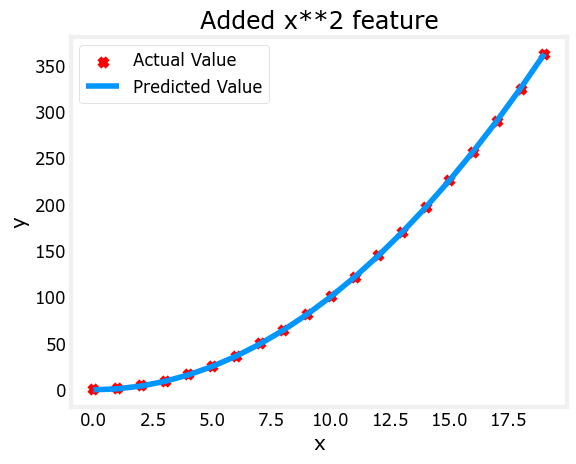

In [72]:
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); 
plt.title("Added x**2 feature")
plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value"); 
plt.xlabel("x"); 
plt.ylabel("y"); 
plt.legend(); 
plt.show()

adding feature x^2 looking nice... now lets add make a cube add degree of 3 .. x^3, then lets see how it work..

In [76]:
# Generate the target data
x = np.arange(0, 20, 1)
y = x**2

#Print the target data
print("x:", x)
print("y:", y)

x: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
y: [  0   1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289
 324 361]


In [79]:
#Engineer the features to include the quadratic and cubic terms
X = np.c_[x, x**2, x**3]
# The expression np.c_[x, x**2, x**3] in Python is used to create a matrix that contains multiple features
# derived from a single input array x

#Print the engineered features
print("X:", X)

X: [[   0    0    0]
 [   1    1    1]
 [   2    4    8]
 [   3    9   27]
 [   4   16   64]
 [   5   25  125]
 [   6   36  216]
 [   7   49  343]
 [   8   64  512]
 [   9   81  729]
 [  10  100 1000]
 [  11  121 1331]
 [  12  144 1728]
 [  13  169 2197]
 [  14  196 2744]
 [  15  225 3375]
 [  16  256 4096]
 [  17  289 4913]
 [  18  324 5832]
 [  19  361 6859]]


In [80]:
# # Reshape the X array to a column vector with the shape (20, 1)
# X = X.reshape(-1, 1)

# Get number of examples and features
m,n = X.shape
# initialize parameters
initial_w = np.zeros(n)
initial_b = 0
# Set the learning rate alpha
alpha = 1e-7
# Set the number of iterations
num_iters = 10000

# Run the gradient descent to get the final weights and bias without feature engineering for polynomial equation
model_w, model_b , hist = gradient_descent(X, y, initial_w, initial_b, compute_cost, compute_gradient, alpha, num_iters)

# Print the final weights and bias
print(f"w,b found by gradient descent: w: {model_w}, b: {model_b :0.4f}")


Iteration         0, Cost: 1.14029e+03
Iteration      1000, Cost: 3.28539e+02
Iteration      2000, Cost: 2.80443e+02
Iteration      3000, Cost: 2.39389e+02
Iteration      4000, Cost: 2.04344e+02
Iteration      5000, Cost: 1.74430e+02
Iteration      6000, Cost: 1.48896e+02
Iteration      7000, Cost: 1.27100e+02
Iteration      8000, Cost: 1.08495e+02
Iteration      9000, Cost: 9.26132e+01
w,b found by gradient descent: w: [0.08 0.54 0.03], b: 0.0106


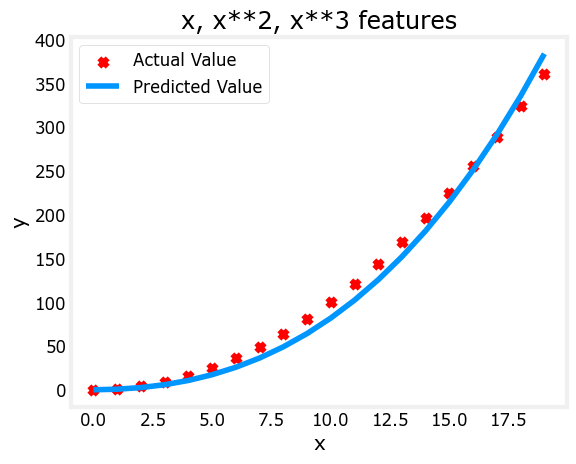

In [81]:
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); 
plt.title("x, x**2, x**3 features")
plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value"); 
plt.xlabel("x"); 
plt.ylabel("y"); 
plt.legend(); 
plt.show()

3rd degree polynonial (x, x**2, x**3) is overfitting a little bit.. so adding degree dependes on the complexity of data and output... 

Determining the polynomial degree (e.g., quadratic, cubic) to fit your data depends on the underlying pattern you believe exists in the relationship between your features and target values.

visualize your points first..then decide

#### Well, lets try something more...

In [93]:
x = np.arange(0,20,1)
y = x**2

# Print the target data
print("x:", x) 
print("y:", y)

x: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
y: [  0   1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289
 324 361]


In [94]:
X = np.c_[x, x**2, x**3]
# Print the engineered features
print("X:", X)

X: [[   0    0    0]
 [   1    1    1]
 [   2    4    8]
 [   3    9   27]
 [   4   16   64]
 [   5   25  125]
 [   6   36  216]
 [   7   49  343]
 [   8   64  512]
 [   9   81  729]
 [  10  100 1000]
 [  11  121 1331]
 [  12  144 1728]
 [  13  169 2197]
 [  14  196 2744]
 [  15  225 3375]
 [  16  256 4096]
 [  17  289 4913]
 [  18  324 5832]
 [  19  361 6859]]


In [89]:
X = zscore_normalize_features(X) 
# Print the normalized features
print("Normalized X:", X)

Normalized X: [[-1.65 -1.09 -0.86]
 [-1.47 -1.08 -0.86]
 [-1.3  -1.05 -0.86]
 [-1.13 -1.01 -0.85]
 [-0.95 -0.95 -0.83]
 [-0.78 -0.87 -0.8 ]
 [-0.61 -0.77 -0.76]
 [-0.43 -0.66 -0.7 ]
 [-0.26 -0.52 -0.62]
 [-0.09 -0.37 -0.52]
 [ 0.09 -0.21 -0.39]
 [ 0.26 -0.02 -0.23]
 [ 0.43  0.18 -0.04]
 [ 0.61  0.4   0.19]
 [ 0.78  0.64  0.45]
 [ 0.95  0.89  0.75]
 [ 1.13  1.17  1.1 ]
 [ 1.3   1.46  1.49]
 [ 1.47  1.77  1.93]
 [ 1.65  2.09  2.42]]


In [90]:
# Get number of examples and features
m,n = X.shape
# initialize parameters
initial_w = np.zeros(n)
initial_b = 0
# Set the learning rate alpha
alpha = 1e-1
# Set the number of iterations
num_iters = 100000

# Run the gradient descent to get the final weights and bias without feature engineering for polynomial equation
model_w, model_b , hist = gradient_descent(X, y, initial_w, initial_b, compute_cost, compute_gradient, alpha, num_iters)

# Print the final weights and bias
print(f"w,b found by gradient descent: w: {model_w}, b: {model_b :0.4f}")

Iteration         0, Cost: 9.42147e+03
Iteration     10000, Cost: 3.90938e-01
Iteration     20000, Cost: 2.78389e-02
Iteration     30000, Cost: 1.98242e-03
Iteration     40000, Cost: 1.41169e-04
Iteration     50000, Cost: 1.00527e-05
Iteration     60000, Cost: 7.15855e-07
Iteration     70000, Cost: 5.09763e-08
Iteration     80000, Cost: 3.63004e-09
Iteration     90000, Cost: 2.58497e-10
w,b found by gradient descent: w: [5.27e-05 1.13e+02 8.43e-05], b: 123.5000


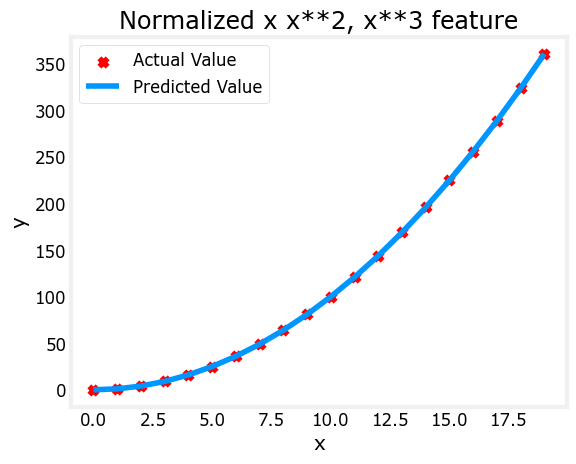

In [91]:
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); 
plt.title("Normalized x x**2, x**3 feature")
plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value"); 
plt.xlabel("x"); 
plt.ylabel("y"); 
plt.legend(); 
plt.show()

In [96]:
# For Raw Data Not Normalized
# Get number of examples and features
m,n = X.shape
# initialize parameters
initial_w = np.zeros(n)
initial_b = 0
# Set the learning rate alpha
alpha = 1e-7
# Set the number of iterations
num_iters = 100000

# Run the gradient descent to get the final weights and bias without feature engineering for polynomial equation
model_w, model_b , hist = gradient_descent(X, y, initial_w, initial_b, compute_cost, compute_gradient, alpha, num_iters)

# Print the final weights and bias
print(f"w,b found by gradient descent: w: {model_w}, b: {model_b :0.4f}")

Iteration         0, Cost: 1.14029e+03
Iteration     10000, Cost: 7.90568e+01
Iteration     20000, Cost: 1.62482e+01
Iteration     30000, Cost: 3.34903e+00
Iteration     40000, Cost: 6.99857e-01
Iteration     50000, Cost: 1.55758e-01
Iteration     60000, Cost: 4.39818e-02
Iteration     70000, Cost: 2.09930e-02
Iteration     80000, Cost: 1.62388e-02
Iteration     90000, Cost: 1.52295e-02
w,b found by gradient descent: w: [1.49e-01 9.76e-01 8.68e-04], b: 0.0187


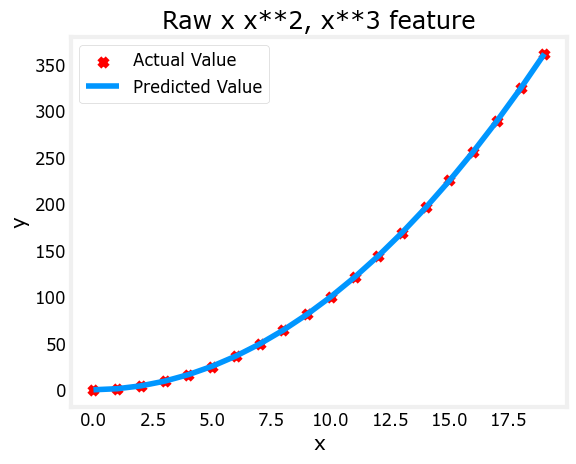

In [97]:
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); 
plt.title("Raw x x**2, x**3 feature")
plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value"); 
plt.xlabel("x"); 
plt.ylabel("y"); 
plt.legend(); 
plt.show()

so this is it... we gain some understanding of non linear data relationships... polynomial regression...